In [11]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.model_selection import FeatureImportances
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from dtreeviz.trees import dtreeviz

In [6]:
with open('database/diabetes.pkl','rb') as f:
    x_treinamento,y_treinamento,x_teste,y_teste = pickle.load(f)

In [7]:
x_treinamento.shape,y_treinamento.shape

((10176, 10), (10176,))

In [8]:
x_teste.shape,y_teste.shape

((3393, 10), (3393,))

## Parâmetro Base

In [9]:
modelo_Dummy = DummyClassifier(random_state=0,strategy="most_frequent")
modelo_Dummy.fit(x_treinamento,y_treinamento)
previsao = modelo_Dummy.predict(x_teste) 
accuracy_score(y_teste, previsao)

0.7211906867079281

In [14]:
params= {'kernel':['rbf','poly','sigmoid','linear'],
         'C':[x for x in range(1,5)],
        }
kf = KFold(n_splits=4,shuffle=True)
diabetic_svm =SVC(random_state = 0)
cv = GridSearchCV(diabetic_svm,param_grid=params,scoring='roc_auc',cv=kf,n_jobs=None,return_train_score=True)
cv.fit(x_treinamento,y_treinamento)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=True),
             estimator=SVC(random_state=0),
             param_grid={'C': [1, 2, 3, 4],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             return_train_score=True, scoring='roc_auc')

In [45]:
cv_results = pd.DataFrame(cv.cv_results_)
cv_results.head()
diabetic_svm_melhor = cv.best_estimator_
score = cross_val_score(diabetic_svm_melhor,x_treinamento,y_treinamento,cv = kf)
media =score.mean()*100
desvio_padrao = score.std()*100
print(f'Accuracy  media {media:.2f}')
print(f'Intervalo Médio {media-2*desvio_padrao:.2f} - {media+2*desvio_padrao:.2f}')
diabetic_svm_melhor

Accuracy  media 88.17
Intervalo Médio 87.03 - 89.30


SVC(C=4, random_state=0)

In [41]:
cv.best_estimator_,cv.best_params_

(SVC(C=4, random_state=0), {'C': 4, 'kernel': 'rbf'})

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2447
           1       0.82      0.78      0.80       946

    accuracy                           0.89      3393
   macro avg       0.87      0.86      0.86      3393
weighted avg       0.89      0.89      0.89      3393



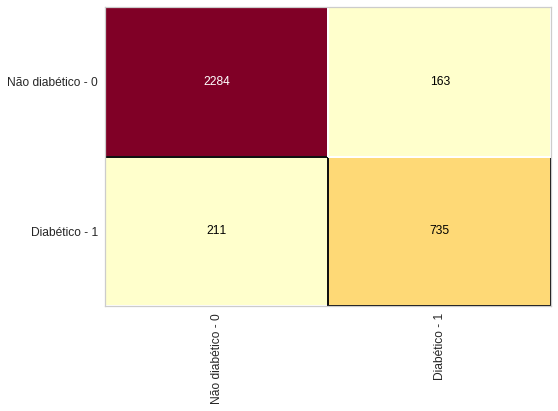

In [20]:
previsao = diabetic_svm_melhor.predict(x_teste)
  
print(classification_report(y_teste,previsao))
cm = ConfusionMatrix(diabetic_svm_melhor,classes=['Não diabético - 0', 'Diabético - 1'])
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste);

In [46]:
with open('modelo/svm_model.pkl', 'wb') as file:
    pickle.dump(diabetic_svm_melhor, file)